In [1]:
# This practial work on decision trees uses https://scikit-learn.org/stable/modules/tree.html

import sklearn 
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

# to get the documentation: use help(tree.DecisionTreeClassifier)


# Added : visualization of the dataset (useful for q4)

/home/naincapable/.conda/envs/tf/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


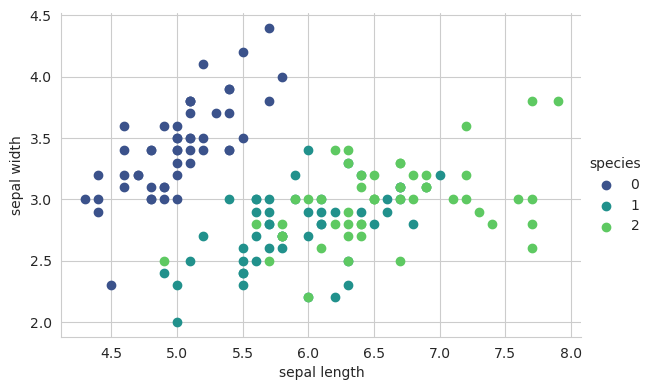

In [2]:
import seaborn as sns
import pandas as pd

data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head(10)

sns.set_style('whitegrid')
sns.FacetGrid(data, hue='species', palette="viridis", height=4, aspect=1.5)\
   .map(plt.scatter,'sepal length','sepal width')\
   .add_legend()
plt.show()

In [3]:
# A very simple example, with two examples X, each in one class y:
clf = tree.DecisionTreeClassifier()
X = [[0, 0], [1, 1]]
y = [0, 1]
#Tree construction
clf = clf.fit(X, y)
# Class prediction for a new example
clf.predict([[2., 2.]])

array([1])

[Text(0.5, 0.75, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

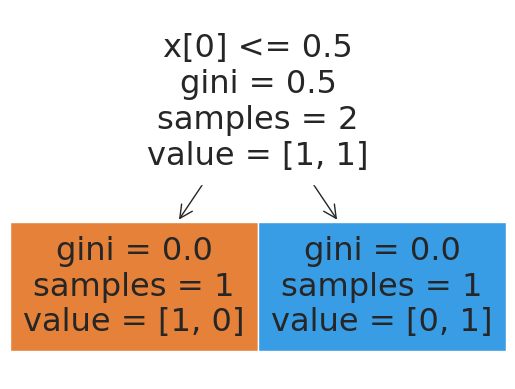

In [4]:
# display of the tree
tree.plot_tree(clf, filled=True)

In [5]:
# Question 1: What is the node test used to build the tree? Explain the prediction for the new sample.


x[1]<= 0.5 est le test utilisé

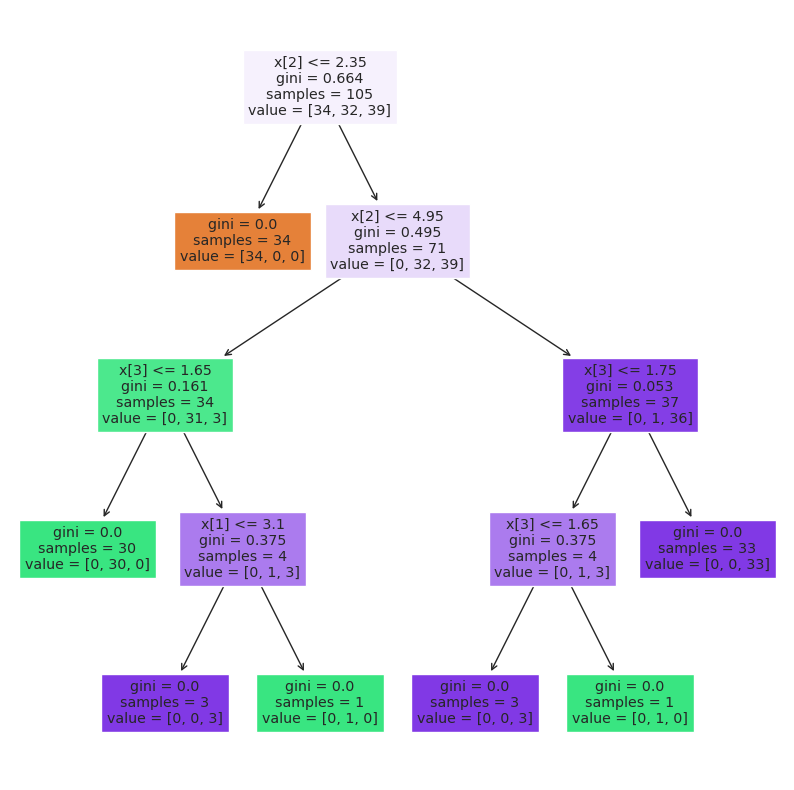

In [6]:
# A more complex example: Iris data (150 samples of 3 types of iris, characterized by 4 attributes) 
# See https://archive.ics.uci.edu/ml/datasets/Iris

X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

In [7]:
# prediction on the test set and computation of the accuracy

clf.predict(X_test)
clf.score(X_test, y_test)


0.9777777777777777

In [8]:
# Question 2: change the initial splitting of the dataset by reducing the size of the training set. 
# What do you observe on the tree? on the accuracy?

# Question 3: clf = tree.DecisionTreeClassifier() uses default parameters (Gini criterion, no limit on max_depth...). 
# Change the max_depth parameter, the min_samples_leaf parameter, and others if enough time.
# Conclusion?


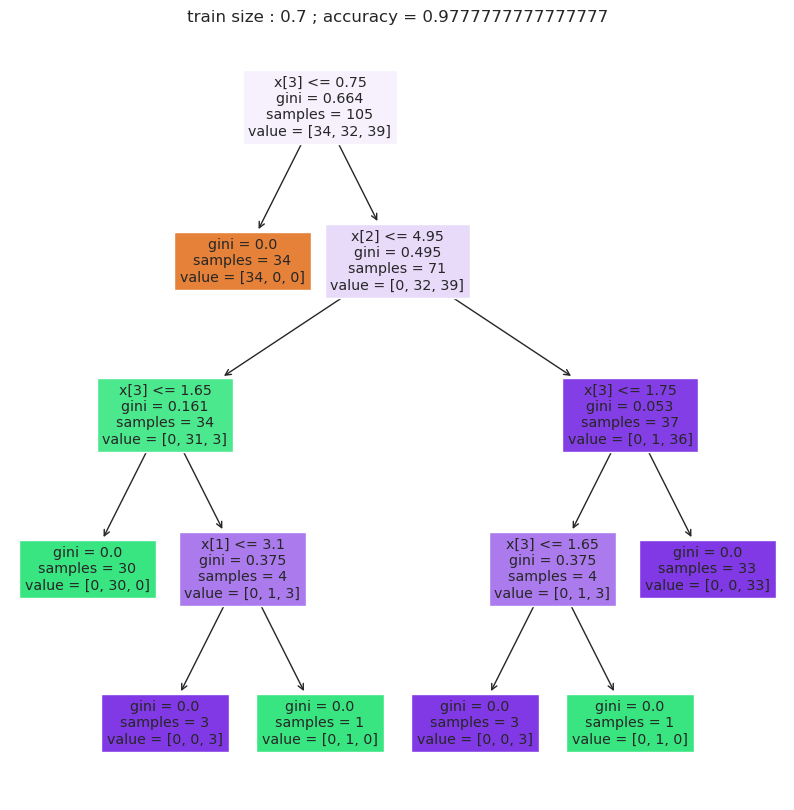

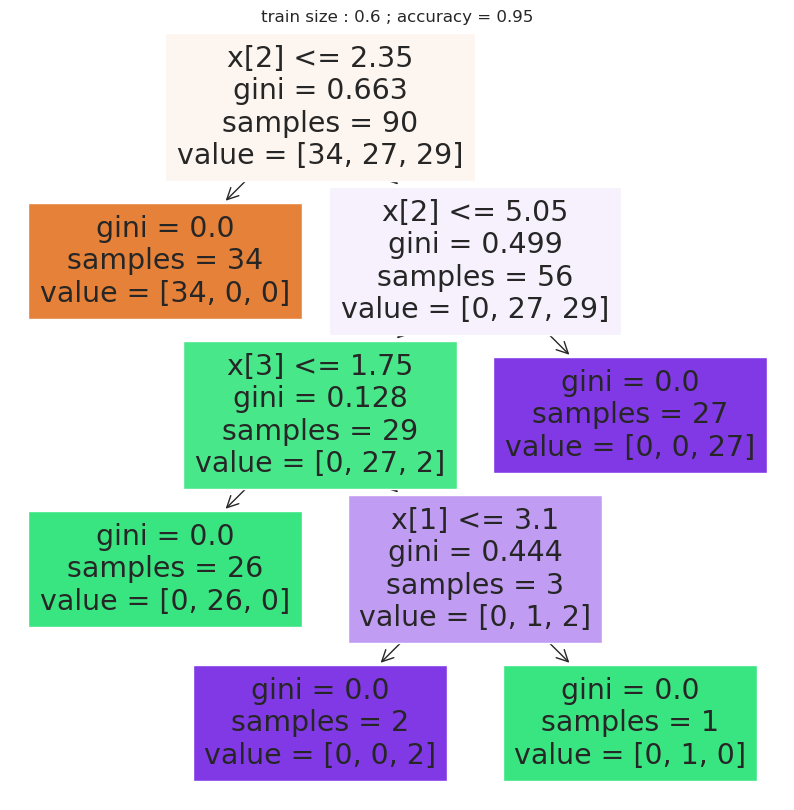

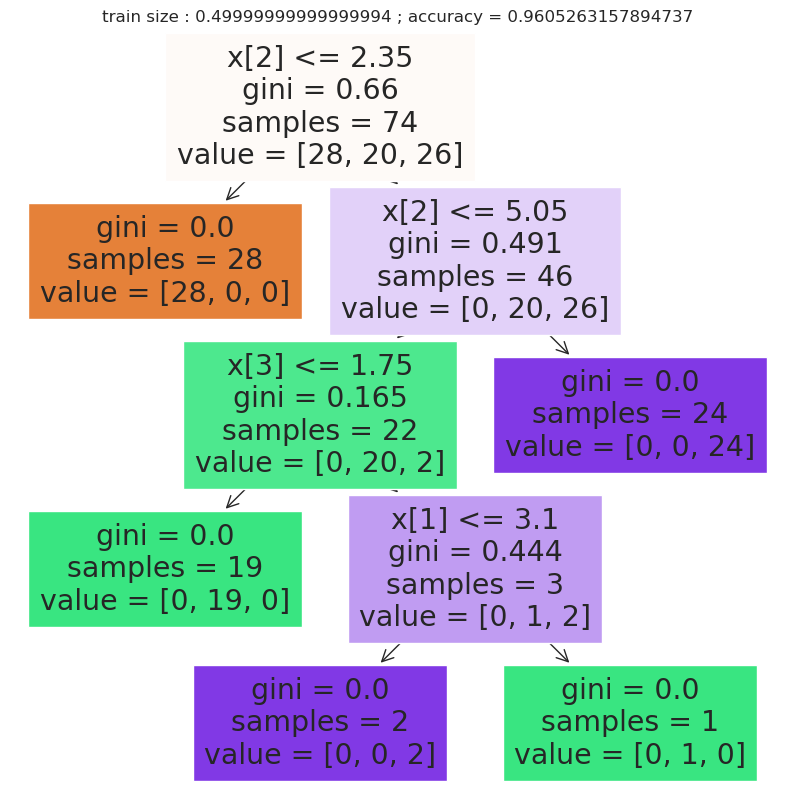

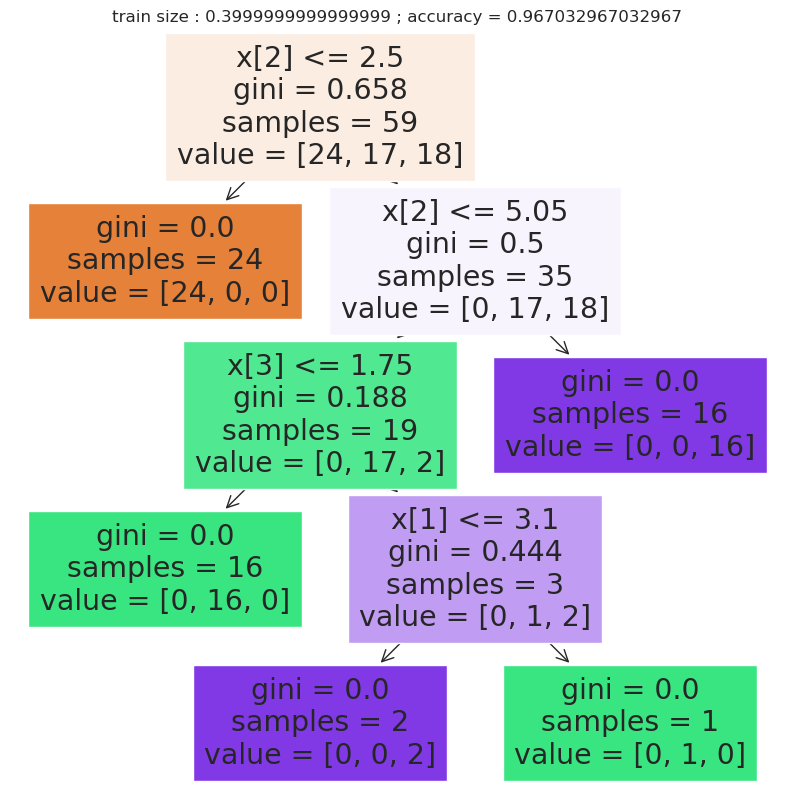

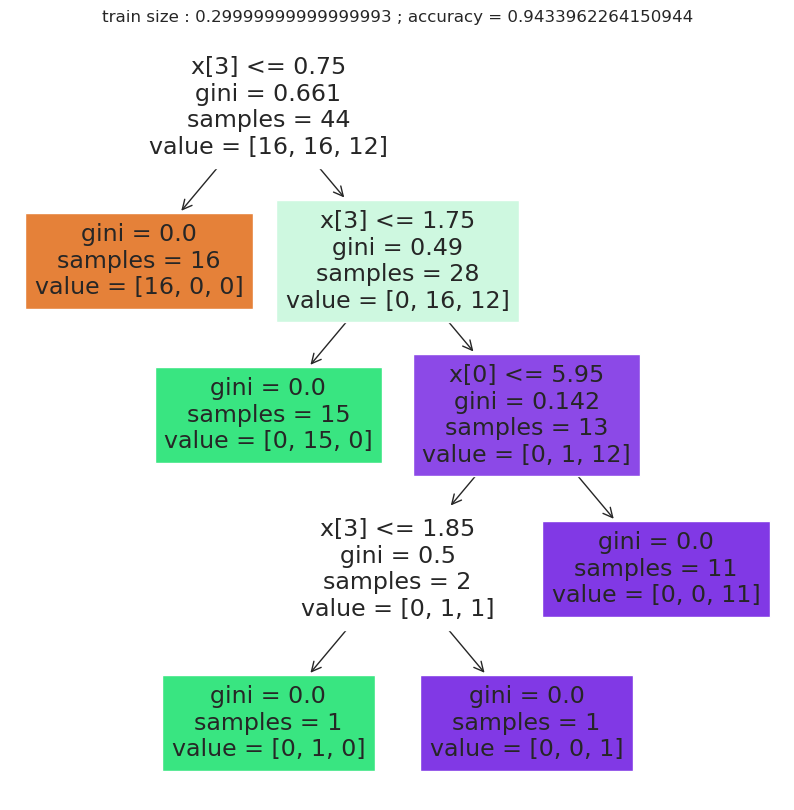

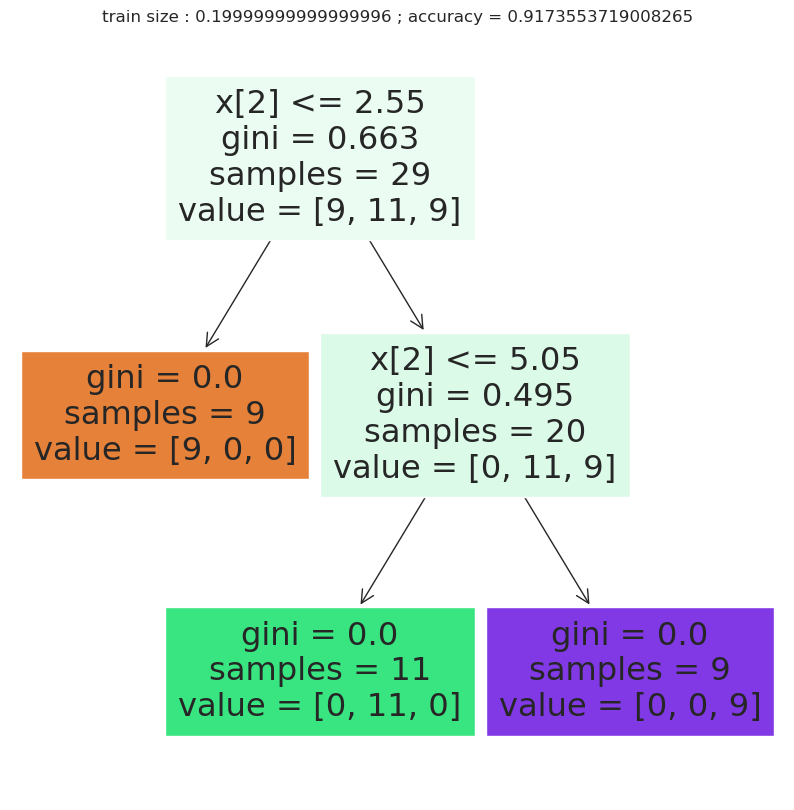

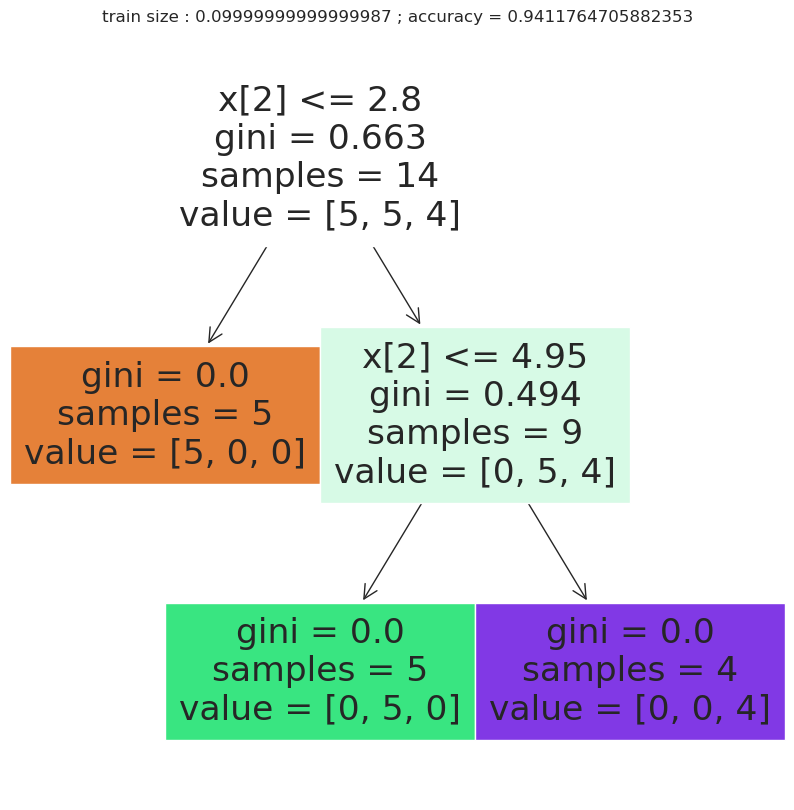

In [9]:
# Q2

for i in range(7):

    X, y = iris.data, iris.target
    # Splitting the data into training set (70%) and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7-i*0.1, random_state=0)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    #display
    plt.figure(figsize=(10,10)) 
    tree.plot_tree(clf,filled=True)
    
    clf.predict(X_test)
    
    plt.title('train size : '+str(0.7-i*0.1)+' ; accuracy = '+str(clf.score(X_test, y_test)))

plt.show()

# Q2 conclusion
We can see that the tree depth is dropping when the drain size diminish. Moreover, the accuracy is slightly dropping when the train size shrink, however the accuracy does not drop significantly. This could be due to the nature of the dataset, in which the different classes are easily classified.

# Q3

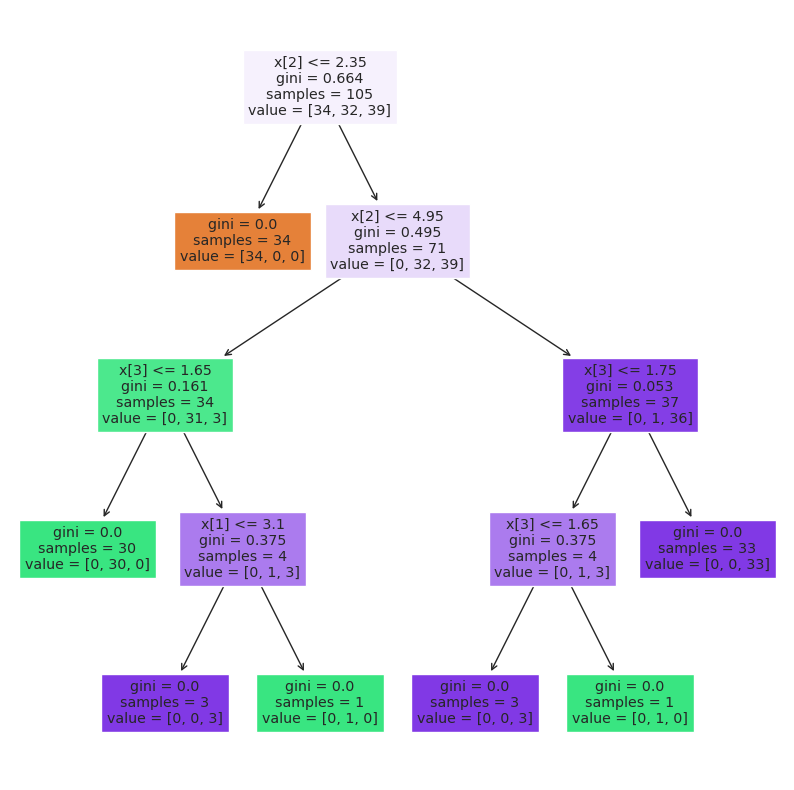

In [10]:
X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

# affinage des paramètres avec GridSearch

In [11]:
from sklearn.model_selection import GridSearchCV
for _ in range(3):
    N = 100
    accuracies = []
    for _ in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
        clf = tree.DecisionTreeClassifier()
        clf.fit(X_train, y_train)
        Z = clf.predict(X_test)
        accuracies.append(clf.score(X_test,y_test))

    pgrid = {"max_depth": [1, 3,5,7, 10, 20, 25, 30, 35],
            "min_samples_split": [2,3,4,5, 10, 15, 20],
            "criterion": ["entropy", "gini", "log_loss"],
            "max_leaf_nodes": [2,3,5,6,8,10,12,15],
            "min_samples_leaf": [1,2,5,10]}
    accuracies.append(clf.score(X_test,y_test))
    grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
    print("max_depth: " + str(grid_search.best_estimator_.max_depth))
    print("min_samples_split: " + str(grid_search.best_estimator_.min_samples_split))
    print("criterion : "+str(grid_search.best_estimator_.criterion))
    print("max_leaf_nodes : "+str(grid_search.best_estimator_.max_leaf_nodes))
    print("min_samples_leaf: " + str(grid_search.best_estimator_.min_samples_leaf))
    print("----------------------------------")

Meilleur score : 0.9777777777777777
max_depth: 5
min_samples_split: 5
criterion : gini
max_leaf_nodes : 5
min_samples_leaf: 1
----------------------------------
Meilleur score : 0.9555555555555556
max_depth: 5
min_samples_split: 3
criterion : gini
max_leaf_nodes : 5
min_samples_leaf: 2
----------------------------------
Meilleur score : 0.9777777777777777
max_depth: 5
min_samples_split: 5
criterion : gini
max_leaf_nodes : 5
min_samples_leaf: 1
----------------------------------


After doing the search several times, we can see that the most efficient values are :
- the criterion GINI
- a max depth of 5
- a min sample leaf of 2 (or 1)
- a min samples split of 3 (or 4)
- max leaf nodes at 5

In [12]:
# Another evaluation can be provided by the confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


## Question 4: by testing different trees (built with different parameter values), does a class appear as easier to classify than the others?

/home/naincapable/.conda/envs/tf/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


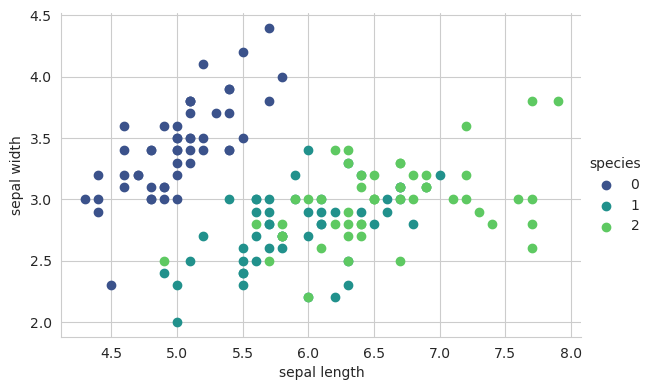

In [13]:
import seaborn as sns
import pandas as pd

data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head(10)

sns.set_style('whitegrid')
sns.FacetGrid(data, hue='species', palette="viridis", height=4, aspect=1.5)\
   .map(plt.scatter,'sepal length','sepal width')\
   .add_legend()
plt.show()

As we can see, the class 0 seems pretty separated from the other ones, therefore it should be the one that is easier to classify. We have now to check the validity of the initial assumption.

Moreover, we can see that in all previous trees, the class 0 was classified at the first node.

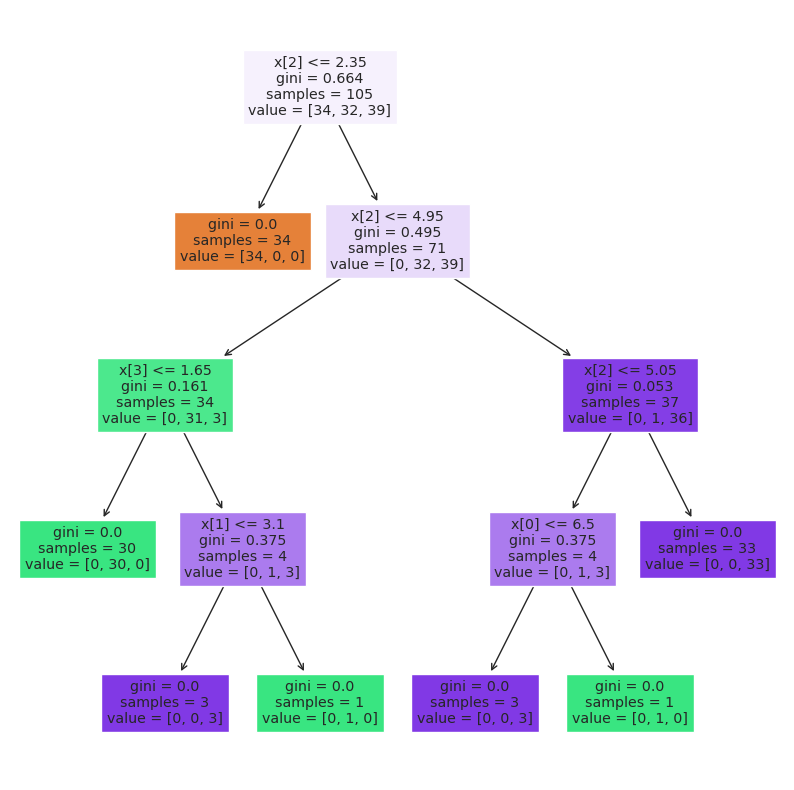

In [14]:
X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

As it is, the Decision Tree classify quite simply the class 0

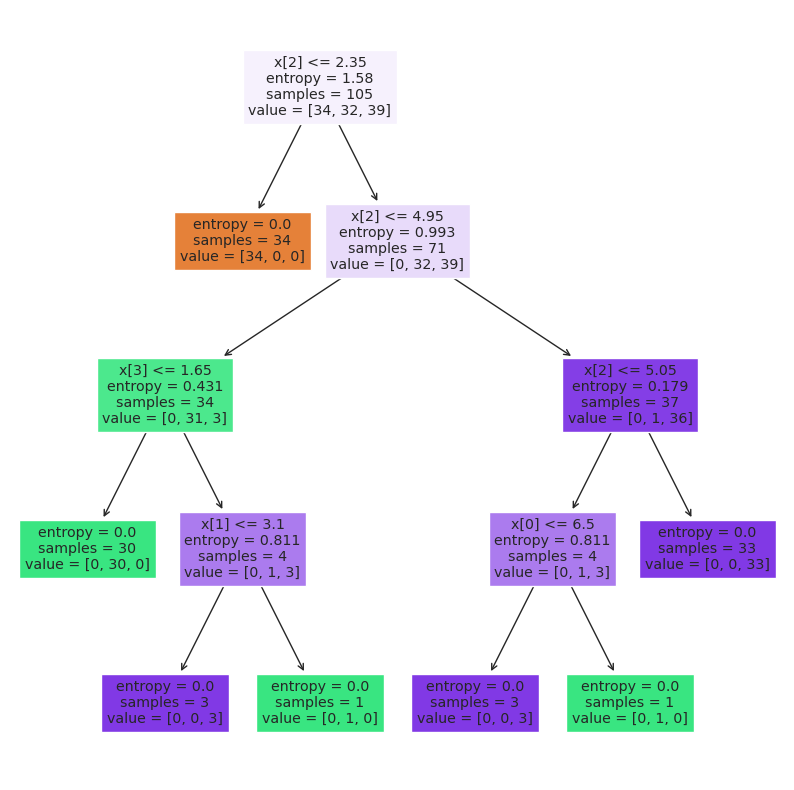

In [15]:
X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

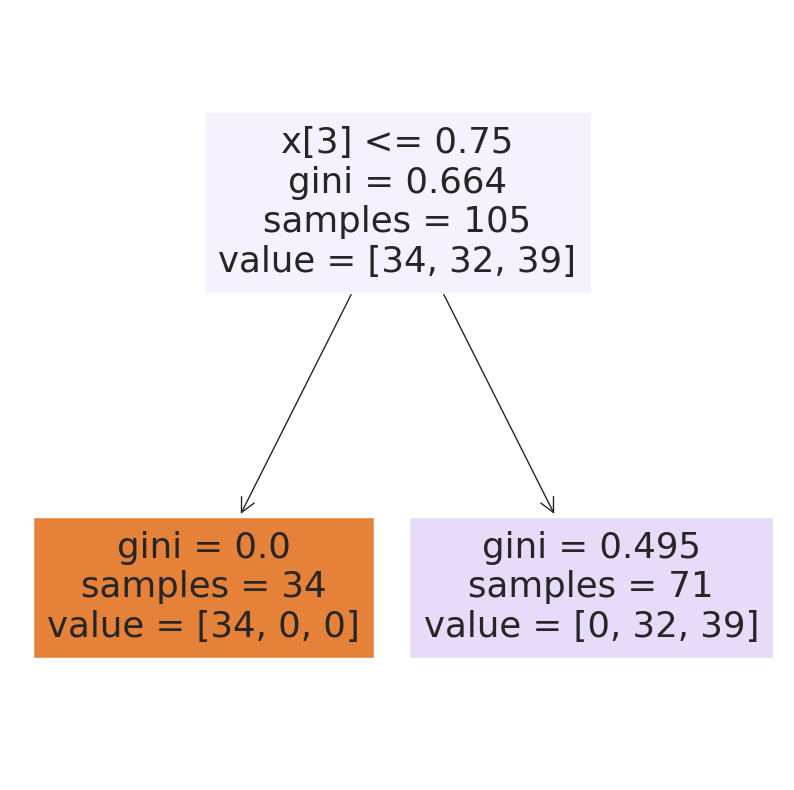

In [19]:
X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier(max_leaf_nodes=2)
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

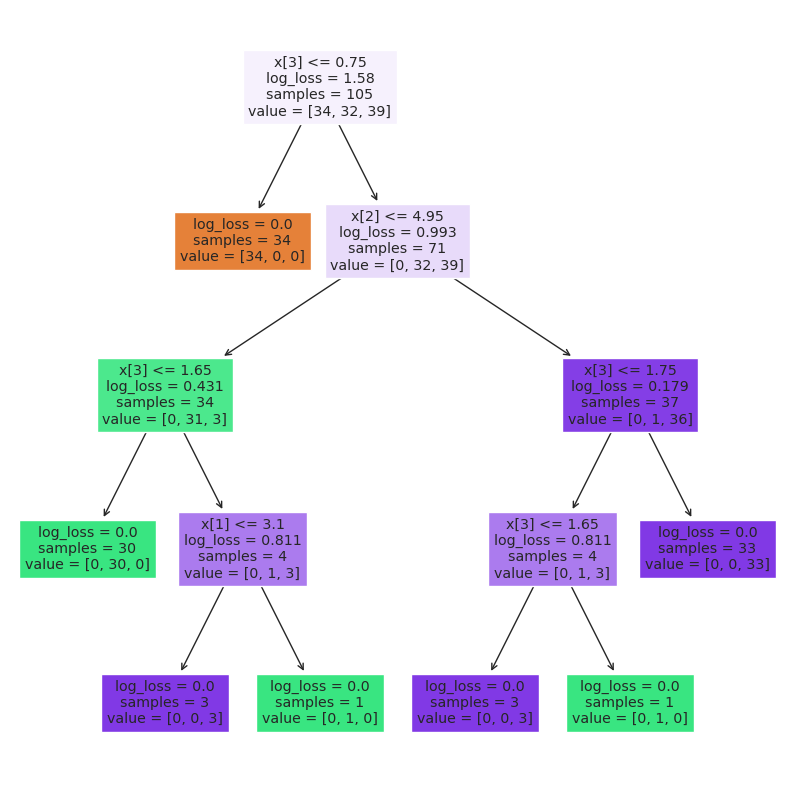

In [23]:
X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier(criterion="log_loss")
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()


After a few testings, we can clearly see that the class 0 is classified at the first node. I have failed to find a parameter that do not classify the class 0 at the first node, and I have been testing more than what are displayed above. That combined with the repartition of the data makes me conclude that the class 0 is by far the most easy to classify for the decision tree.